In [168]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [170]:
type(data)


dict

In [172]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [174]:
#normalizing the data and putting in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19798125.00,19798125.00,False,NaN,1,NaN,NaN,None,2024-12-19T07:34:00.000Z,101463.28,95638074291.86,21.91,0.35,-2.53,0.75,10.38,48.34,59.83,2008782676275.88,56.93,2130728854464.42,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
1,1027,Ethereum,ETH,ethereum,9698,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120452775.39,120452775.39,True,NaN,2,NaN,NaN,None,2024-12-19T07:34:00.000Z,3690.28,51416589413.48,36.91,0.36,-3.96,-6.02,18.06,39.42,44.43,444503872623.63,12.60,444503872623.63,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
2,825,Tether USDt,USDT,tether,109069,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140629475030.02,143442815940.80,True,NaN,3,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,218451416099.26,28.21,-0.01,-0.05,-0.08,-0.11,-0.04,-0.06,140546534370.13,3.98,143358216024.55,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-19 12:35:48.094427
3,52,XRP,XRP,xrp,1483,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57187870382.00,99986858106.00,False,NaN,4,NaN,NaN,None,2024-12-19T07:34:00.000Z,2.37,22439582625.52,17.03,0.85,-5.85,-2.73,113.10,337.73,303.83,135656482726.86,3.84,237211985375.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
4,5426,Solana,SOL,solana,811,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479159805.01,590369582.40,True,NaN,5,NaN,NaN,None,2024-12-19T07:34:00.000Z,210.80,7155051429.89,2.43,0.34,-2.33,-8.82,-13.34,32.51,40.62,101008143445.97,2.86,124451456154.91,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
5,1839,BNB,BNB,bnb,2311,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007976.49,144007976.49,False,NaN,6,NaN,NaN,None,2024-12-19T07:34:00.000Z,700.51,2850824129.62,10.75,-0.10,-1.55,-2.60,13.44,17.20,22.35,100878885940.54,2.86,100878885940.54,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147261966383.71,147261966383.71,True,NaN,7,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.36,6373545531.93,49.45,0.38,-5.53,-13.17,-7.42,153.74,241.05,53468192979.06,1.52,53468192979.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
7,3408,USDC,USDC,usd-coin,24000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42335075026.64,42335075026.64,False,NaN,8,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,13936159209.42,24.43,-0.01,0.00,0.01,0.01,0.02,0.00,42334932471.29,1.20,42334932471.29,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-19 12:35:48.094427
8,2010,Cardano,ADA,cardano,1409,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35119317307.65,44995089702.97,False,NaN,9,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.98,2138437922.94,22.65,0.29,-4.07,-15.73,29.78,180.22,174.02,34526050561.78,0.98,4

In [176]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    
    # Creating a csv and appending data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\miras\OneDrive\Рабочий стол\project\API.csv'):
        #df.to_csv(r'C:\Users\miras\OneDrive\Рабочий стол\project\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\miras\OneDrive\Рабочий стол\project\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\miras\OneDrive\Рабочий стол\project\API.csv')



In [177]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [191]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19798125.00,19798125.00,False,NaN,1,NaN,NaN,None,2024-12-19T07:34:00.000Z,101463.28,95638074291.86,21.91,0.35,-2.53,0.75,10.38,48.34,59.83,2008782676275.88,56.93,2130728854464.42,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
1,1027,Ethereum,ETH,ethereum,9698,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120452775.39,120452775.39,True,NaN,2,NaN,NaN,None,2024-12-19T07:34:00.000Z,3690.28,51416589413.48,36.91,0.36,-3.96,-6.02,18.06,39.42,44.43,444503872623.63,12.60,444503872623.63,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
2,825,Tether USDt,USDT,tether,109069,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140629475030.02,143442815940.80,True,NaN,3,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,218451416099.26,28.21,-0.01,-0.05,-0.08,-0.11,-0.04,-0.06,140546534370.13,3.98,143358216024.55,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-19 12:35:48.094427
3,52,XRP,XRP,xrp,1483,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57187870382.00,99986858106.00,False,NaN,4,NaN,NaN,None,2024-12-19T07:34:00.000Z,2.37,22439582625.52,17.03,0.85,-5.85,-2.73,113.10,337.73,303.83,135656482726.86,3.84,237211985375.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
4,5426,Solana,SOL,solana,811,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479159805.01,590369582.40,True,NaN,5,NaN,NaN,None,2024-12-19T07:34:00.000Z,210.80,7155051429.89,2.43,0.34,-2.33,-8.82,-13.34,32.51,40.62,101008143445.97,2.86,124451456154.91,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
5,1839,BNB,BNB,bnb,2311,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007976.49,144007976.49,False,NaN,6,NaN,NaN,None,2024-12-19T07:34:00.000Z,700.51,2850824129.62,10.75,-0.10,-1.55,-2.60,13.44,17.20,22.35,100878885940.54,2.86,100878885940.54,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147261966383.71,147261966383.71,True,NaN,7,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.36,6373545531.93,49.45,0.38,-5.53,-13.17,-7.42,153.74,241.05,53468192979.06,1.52,53468192979.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
7,3408,USDC,USDC,usd-coin,24000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42335075026.64,42335075026.64,False,NaN,8,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,13936159209.42,24.43,-0.01,0.00,0.01,0.01,0.02,0.00,42334932471.29,1.20,42334932471.29,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-19 12:35:48.094427
8,2010,Cardano,ADA,cardano,1409,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35119317307.65,44995089702.97,False,NaN,9,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.98,2138437922.94,22.65,0.29,-4.07,-15.73,29.78,180.22,174.02,34526050561.78,0.98,4

In [192]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [195]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19798125.00,19798125.00,False,NaN,1,NaN,NaN,None,2024-12-19T07:34:00.000Z,101463.28,95638074291.86,21.91,0.35,-2.53,0.75,10.38,48.34,59.83,2008782676275.88,56.93,2130728854464.42,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
1,1027,Ethereum,ETH,ethereum,9698,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120452775.39,120452775.39,True,NaN,2,NaN,NaN,None,2024-12-19T07:34:00.000Z,3690.28,51416589413.48,36.91,0.36,-3.96,-6.02,18.06,39.42,44.43,444503872623.63,12.60,444503872623.63,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
2,825,Tether USDt,USDT,tether,109069,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,140629475030.02,143442815940.80,True,NaN,3,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,218451416099.26,28.21,-0.01,-0.05,-0.08,-0.11,-0.04,-0.06,140546534370.13,3.98,143358216024.55,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-19 12:35:48.094427
3,52,XRP,XRP,xrp,1483,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,57187870382.00,99986858106.00,False,NaN,4,NaN,NaN,None,2024-12-19T07:34:00.000Z,2.37,22439582625.52,17.03,0.85,-5.85,-2.73,113.10,337.73,303.83,135656482726.86,3.84,237211985375.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
4,5426,Solana,SOL,solana,811,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479159805.01,590369582.40,True,NaN,5,NaN,NaN,None,2024-12-19T07:34:00.000Z,210.80,7155051429.89,2.43,0.34,-2.33,-8.82,-13.34,32.51,40.62,101008143445.97,2.86,124451456154.91,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
5,1839,BNB,BNB,bnb,2311,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007976.49,144007976.49,False,NaN,6,NaN,NaN,None,2024-12-19T07:34:00.000Z,700.51,2850824129.62,10.75,-0.10,-1.55,-2.60,13.44,17.20,22.35,100878885940.54,2.86,100878885940.54,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147261966383.71,147261966383.71,True,NaN,7,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.36,6373545531.93,49.45,0.38,-5.53,-13.17,-7.42,153.74,241.05,53468192979.06,1.52,53468192979.06,None,2024-12-19T07:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-19 12:35:48.094427
7,3408,USDC,USDC,usd-coin,24000,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42335075026.64,42335075026.64,False,NaN,8,NaN,NaN,None,2024-12-19T07:34:00.000Z,1.00,13936159209.42,24.43,-0.01,0.00,0.01,0.01,0.02,0.00,42334932471.29,1.20,42334932471.29,None,2024-12-19T07:34:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-19 12:35:48.094427
8,2010,Cardano,ADA,cardano,1409,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35119317307.65,44995089702.97,False,NaN,9,NaN,NaN,None,2024-12-19T07:34:00.000Z,0.98,2138437922.94,22.65,0.29,-4.07,-15.73,29.78,180.22,174.02,34526050561.78,0.98,4

In [197]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27,-2.42,0.88,10.43,48.44,59.88
Ethereum,0.35,-3.87,-5.80,18.18,39.53,44.51
Tether USDt,0.00,-0.03,-0.07,-0.11,-0.04,-0.06
XRP,0.61,-5.58,-2.61,113.90,338.44,304.11
Solana,0.43,-2.12,-8.56,-13.14,32.84,40.74
BNB,-0.14,-1.41,-2.37,13.54,17.33,22.49
Dogecoin,0.26,-5.33,-12.81,-7.78,153.96,241.41
USDC,0.01,0.02,0.02,0.01,0.02,0.01
Cardano,0.21,-3.82,-15.39,30.12,180.50,174.31


In [199]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.27
             quote.USD.percent_change_24h    -2.42
             quote.USD.percent_change_7d      0.88
             quote.USD.percent_change_30d    10.43
             quote.USD.percent_change_60d    48.44
             quote.USD.percent_change_90d    59.88
Ethereum     quote.USD.percent_change_1h      0.35
             quote.USD.percent_change_24h    -3.87
             quote.USD.percent_change_7d     -5.80
             quote.USD.percent_change_30d    18.18
             quote.USD.percent_change_60d    39.53
             quote.USD.percent_change_90d    44.51
Tether USDt  quote.USD.percent_change_1h      0.00
             quote.USD.percent_change_24h    -0.03
             quote.USD.percent_change_7d     -0.07
             quote.USD.percent_change_30d    -0.11
             quote.USD.percent_change_60d    -0.04
             quote.USD.percent_change_90d    -0.06
XRP          quote.USD.percent_change_1h

In [201]:
type(df4)

pandas.core.series.Series

In [203]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h     0.27
            quote.USD.percent_change_24h   -2.42
            quote.USD.percent_change_7d     0.88
            quote.USD.percent_change_30d   10.43
            quote.USD.percent_change_60d   48.44
            quote.USD.percent_change_90d   59.88
Ethereum    quote.USD.percent_change_1h     0.35
            quote.USD.percent_change_24h   -3.87
            quote.USD.percent_change_7d    -5.80
            quote.USD.percent_change_30d   18.18
            quote.USD.percent_change_60d   39.53
            quote.USD.percent_change_90d   44.51
Tether USDt quote.USD.percent_change_1h     0.00
            quote.USD.percent_change_24h   -0.03
            quote.USD.percent_change_7d    -0.07
            quote.USD.percent_change_30d   -0.11
            quote.USD.percent_change_60d   -0.04
            quote.USD.percent_change_90d   -0.06
XRP         quote.USD.percent_change_1h     0.61
            quote.USD.percent_change_24h   -5.58
            quote.USD.percent_change_7d    -2.61
            quote.USD.percent_change_30d  113.90
            quote.USD.percent_change_60d  338.44
            quote.USD.percent_change_90d  304.11
Solana      quote.USD.percent_change_1h     0.43
            quote.USD.percent_change_24h   -2.12
            quote.USD.percent_change_7d    -8.56
            quote.USD.percent_change_30d  -13.14
            quote.USD.percent_change_60d   32.84
            quote.USD.percent_change_90d   40.74
BNB         quote.USD.percent_change_1h    -0.14
            quote.USD.percent_change_24h   -1.41
            quote.USD.percent_change_7d    -2.37
            quote.USD.percent_change_30d   13.54
            quote.USD.percent_change_60d   17.33
            quote.USD.percent_change_90d   22.49
Dogecoin    quote.USD.percent_change_1h     0.26
            quote.USD.percent_change_24h   -5.33
            quote.USD.percent_change_7d   -12.81
            quote.USD.percent_change_30d   -7.78
            quote.USD.percent_change_60d  153.96
            quote.USD.percent_change_90d  241.41
USDC        quote.USD.percent_change_1h     0.01
            quote.USD.percent_change_24h    0.02
            quote.USD.percent_change_7d     0.02
            quote.USD.percent_change_30d    0.01
            quote.USD.percent_change_60d    0.02
            quote.USD.percent_change_90d    0.01
Cardano     quote.USD.percent_change_1h     0.21
            quote.USD.percent_change_24h   -3.82
            quote.USD.percent_change_7d   -15.39
            quote.USD.percent_change_30d   30.12
            quote.USD.percent_change_60d  180.50
            quote.USD.percent_change_90d  174.31
TRON        quote.USD.percent_change_1h     0.39
            quote.USD.percent_change_24h   -3.14
            quote.USD.percent_change_7d   -10.40
            quote.USD.percent_change_30d   28.59
            quote.USD.percent_change_60d   68.85
            quote.USD.percent_change_90d   73.50
Avalanche   quote.USD.percent_change_1h     0.71
            quote.USD.percent_change_24h   -7.67
            quote.USD.percent_change_7d   -14.61
            quote.USD.percent_change_30d   21.46
            quote.USD.percent_change_60d   53.43
            quote.USD.percent_change_90d   52.81
Chainlink   quote.USD.percent_change_1h     0.89
            quote.USD.percent_change_24h   -8.89
            quote.USD.percent_change_7d   -14.06
            quote.USD.percent_change_30d   66.32
            quote.USD.percent_change_60d  118.56
            quote.USD.percent_change_90d  113.63
Shiba Inu   quote.USD.percent_change_1h     0.01
            quote.USD.percent_change_24h   -5.83
            quote.USD.percent_change_7d   -17.35
            quote.USD.percent_change_30d   -5.11
            quote.USD.percent_change_60d   28.62
            quote.USD.percent_change_90d   67.94
Toncoin     quote.USD.percent_change_1h     0.24
            quote.USD.percent_change_24h   -4.05
            quote.USD.pe

In [205]:
df5.count()

values    90
dtype: int64

In [207]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27
1,Bitcoin,quote.USD.percent_change_24h,-2.42
2,Bitcoin,quote.USD.percent_change_7d,0.88
3,Bitcoin,quote.USD.percent_change_30d,10.43
4,Bitcoin,quote.USD.percent_change_60d,48.44
5,Bitcoin,quote.USD.percent_change_90d,59.88
6,Ethereum,quote.USD.percent_change_1h,0.35
7,Ethereum,quote.USD.percent_change_24h,-3.87
8,Ethereum,quote.USD.percent_change_7d,-5.80
9,Ethereum,quote.USD.percent_change_30d,18.18


In [209]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27
1,Bitcoin,quote.USD.percent_change_24h,-2.42
2,Bitcoin,quote.USD.percent_change_7d,0.88
3,Bitcoin,quote.USD.percent_change_30d,10.43
4,Bitcoin,quote.USD.percent_change_60d,48.44
5,Bitcoin,quote.USD.percent_change_90d,59.88
6,Ethereum,quote.USD.percent_change_1h,0.35
7,Ethereum,quote.USD.percent_change_24h,-3.87
8,Ethereum,quote.USD.percent_change_7d,-5.80
9,Ethereum,quote.USD.percent_change_30d,18.18


In [211]:

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.27
1,Bitcoin,24h,-2.42
2,Bitcoin,7d,0.88
3,Bitcoin,30d,10.43
4,Bitcoin,60d,48.44
5,Bitcoin,90d,59.88
6,Ethereum,1h,0.35
7,Ethereum,24h,-3.87
8,Ethereum,7d,-5.80
9,Ethereum,30d,18.18


In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

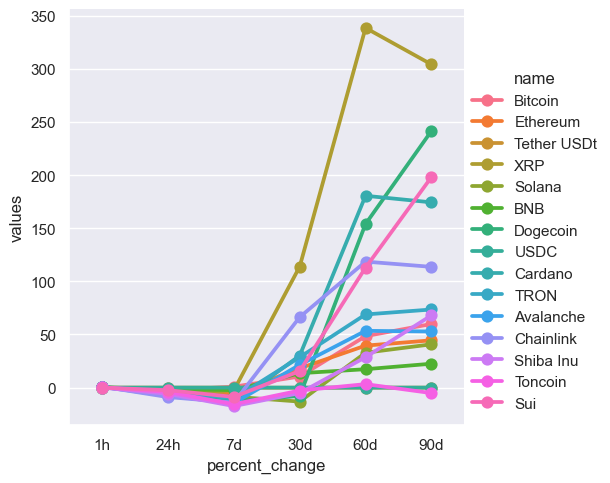

In [215]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [257]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,101463.28,2024-12-19 12:35:48.094427
15,Bitcoin,101463.28,2024-12-19 12:35:50.284858
30,Bitcoin,101457.66,2024-12-19 12:36:51.027595
45,Bitcoin,101460.35,2024-12-19 12:37:51.559013
60,Bitcoin,101463.03,2024-12-19 12:38:52.063809
75,Bitcoin,101531.72,2024-12-19 12:39:52.526194
90,Bitcoin,101559.07,2024-12-19 12:40:53.088944
105,Bitcoin,101544.49,2024-12-19 12:41:53.565373
120,Bitcoin,101544.49,2024-12-19 12:42:54.038633
135,Bitcoin,101602.94,2024-12-19 12:43:54.501461


In [273]:
df11 = df[['name', 'quote.USD.price', 'timestamp']]
df11 = df11.query("name =='Ethereum'")




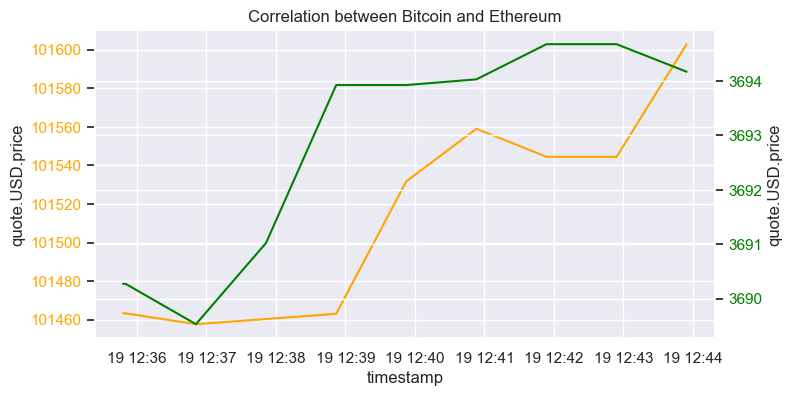

In [277]:
# Investigating correlation between the Bitcoin and Ethereum 

sns.set_theme(style="darkgrid")
fig, ax1 = plt.subplots(figsize=(8,4))


sns.lineplot(data=df10, x='timestamp', y='quote.USD.price', ax=ax1, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2=ax1.twinx()
sns.lineplot(data=df11, x='timestamp', y='quote.USD.price', ax=ax2, c='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Correlation between Bitcoin and Ethereum')

plt.show()
